<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
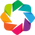

Initializing Julia interpreter. This may take some time...


In [1]:
import numpy as np
import holoviews as hv; hv.extension('bokeh')
import panel as pn;     pn.extension()
from panel.interact import interact

import sympy as sp
from IPython.display import display, Math

from julia.api import Julia
jl = Julia(compiled_modules=False)
from julia import Main

def format_matrix_with_parentheses(A):
    A_latex = sp.latex(A)
    return A_latex.replace("\\begin{bmatrix}", "\\begin{pmatrix}").replace("\\end{bmatrix}", "\\end{pmatrix}")

%load_ext julia.magic

In [ ]:
%%julia
using Pkg, Revise
gla_dir = "../GenLinAlgProblems"
Pkg.activate(gla_dir)
using GenLinAlgProblems, LinearAlgebra, RowEchelon, LaTeXStrings, Latexify, Markdown, Printf

<div style="float:center;width:100%;text-align:center;">
<strong style="height:100px;color:darkred;font-size:40px;">Functions of Degenerate Matrices</strong><br>
</div>

# 1. Introduction

In the notebooks [**Functions Of A Matrix**](FunctionsOfAMatrix.ipynb) and [**Functions Of A Matrix Examples**](FunctionsOfAMatrix.ipynb)
we saw how to compute functions of a diagonalizable matrix.

In this notebook, we will explore how to compute functions of a degenerate matrix using its [**Jordan Form**](JordanForm.ipynb)

## 1.1 Jordan Blocks and Matrix Powers

### 1.1.1 Definition

<div style="float:left;width:100%;background-color:#F2F5A9;color:black;">

**Definition:** A Jordan block $J$ associated with an eigenvalue $\lambda$ is defined as $J = \lambda I + N$<br>
$\qquad$ where $I$ is the identity matrix, and $N$ is a matrix with zeros everywhere except for ones on the superdiagonal<br>
$\qquad$ (the diagonal immediately above the main diagonal).
</div>

Emphasizing the matrix sizes $n\times n$ and the eigenvalues $\lambda$, a Jordan Block $J_n(\lambda) = \lambda I + N_n$ thus has the following structure:

$\qquad
N_n = \begin{pmatrix}
0 & 1 & 0 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \ddots & \vdots \\
0 & 0 & \cdots & 0 & 1 \\
0 & 0 & \cdots & 0 & 0
\end{pmatrix},\;\;
$ and $\;\; J_n(\lambda) = \begin{pmatrix}
\lambda & 1 & 0 & \cdots & 0 \\
0 & \lambda & 1 & \cdots & 0 \\
\vdots & \vdots & \ddots & \ddots & \vdots \\
0 & 0 & \cdots & \lambda & 1 \\
0 & 0 & \cdots & 0 & \lambda
\end{pmatrix}$

### 1.1.2 Powers of a Jordan Block

Using the binomial theorem, the $k$-th power of $J$ can be expressed as

$\qquad J_n(\lambda)^k = (\lambda I + N_n)^k = \sum_{m=0}^k \binom{k}{m} \lambda^{k-m} N_n^m,$

where $\binom{k}{m} = \frac{k!}{m!(k-m)!}$ is the binomial coefficient.

The powers of $N_n^m$ are simple to compute. For example,

In [2]:
%%julia
A  = [0 1 0 0; 0 0 1 0; 0 0 0 1; 0 0 0 0]
A2 = A^2
A3 = A2 * A
A4 = A3 * A

py_show( L"A =", A, L"\qquad A^2 =", A2, L"\qquad A^3 =", A3, L"\qquad A^4 =", A4 )

UsageError: Cell magic `%%julia` not found.


## 1.1 Definition and Examples

<div style="float:left;width:100%;background-color:#F2F5A9;color:black;">

**Definition:** A matrix $A$ is **nilpotent** if there exists a positive integer $k$ such that $A^k = 0.$<br>
$\qquad$ The smallest such $k$ is called the **nilpotency index** of the matrix.
</div>

For example, the following matrix $A$ is nilpotent with a nilpotency index of 3:

____
Let us write an *is_nilpotent()* function and test it

In [4]:
%%julia
function is_nilpotent(matrix::AbstractMatrix, max_power::Int=size(matrix,1))
    # with larger integer matrices, this is likely to fail!
    powers        = [matrix]  # Initialize list to store intermediate powers
    current_power = matrix

    for k in 2:max_power
        current_power = current_power * matrix
        push!(powers, current_power)
        if norm(current_power) ≈ 0.0  # Check if the matrix is close to zero
            return (true, k, powers)
        end
    end

    return (false, nothing, powers)  # returns true/false, index of nilpotency, matrix powers
end;

In [5]:
%%julia
function tst_3x3(n=3)
    for _ in 1:n
        _,_,_,A = gen_degenerate_matrix(3)
        ok,_ndx,m_list = is_nilpotent( Int.(A) )

        powers = []
        for i in 1:_ndx  push!( powers, l_show(L"\quad A^{%$(i-1)} =", m_list[i])) end
        py_show(powers...)
    end
end
tst_3x3()

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [6]:
def visualize_nilpotent_matrix(powers, ok):
    if powers is None: return
    n           = powers[0].shape[0]
    ndx         = len(powers)
    abs_powers  = [np.abs(power) for power in powers]
    # max_val     = max(*[np.max(abs_powers[k]) for k in range(ndx)],1e-6)
    max_val     = max(np.max(abs_powers[0]), 1e-6)
    epsilon     = max_val * 1e-3  # Small fraction of max_val to create a gap
    color_range = (-epsilon, max_val)  # Widen the range to ensure zero is distinct

    heatmaps = {
        k : hv.HeatMap((range(n), range(n), abs_powers[k]))\
                    .opts(xticks=None, yticks=None, title = f"A^{k}")
        for k in range(ndx)
    }

    dmap = hv.DynamicMap(
        lambda i: heatmaps[i], kdims=["Power"]
    ).redim.values(Power=list(range(0, ndx)))

    return dmap.opts( width=300, height=300, colorbar=True, cmap="plasma", clim=color_range,
        tools=["hover"]
    )

def heatmap_of_powers(N):
    maxint = 3 if N < 10 else 1
    _,_,_,A = Main.gen_degenerate_matrix(N, maxint=maxint)

    ok,_,powers = Main.is_nilpotent( A ,N+1)
    return powers,ok
powers,ok = heatmap_of_powers(15)
print(f"For larger matrices, the numerical computations may fail:\nOk numerically? {ok}")
visualize_nilpotent_matrix(powers,ok)

For larger matrices, the numerical computations may fail:
Ok numerically? True


:DynamicMap   [Power]
   :HeatMap   [x,y]   (z)

## 1.2 Eigenvalues and Eigenvectors

### 1.2.1 Eigenvalues

<div style="float:left;width:100%;height:0.8cm;background-color:#F2F5A9;color:black;">

**Theorem:** All **eigenvalues** of a nilpotent matrix are zero.
</div>

Consider a nilpotent matrix $A$ with nilpotency index $k$ and an eigenpair $(\lambda, v)$

$\qquad A v = \lambda v \Rightarrow  A^k v = \lambda^k v$:<br>
$\qquad$ Since $A^k = 0,\;\;$ we therefore have $\;\;\lambda^k v = 0 \Rightarrow \lambda^k v^t v = 0$.<br>
$\qquad$ Since $v \neq 0,\;\; v^t v = \Vert v \Vert^2 \ne 0\;\;\;\therefore \;\;\lambda = 0$.

### 1.2.2 Eigenvectors of Nilpotent Matrices, Jordan Form

The eigenvectors of a nilpotent matrix $A$  correspond to the eigenvalue $\lambda = 0$.<br>
However, $A$ **may be degenerate,** so that there are not enough eigenvectors.

We therefore consider the [**Jordan Form**](JordanForm.ipynb) of $A$:

The **Jordan Form of a nilpotent matrix** $A$ with index $k$ is $A = P J P^{-1},\;\;$ where<br>
* $J$ is the Jordan canonical form of $A$
* $P$ is an invertible matrix consisting of generalized eigenvectors associated with each block of $J$.

Since the eigenvalues are zeros, $J$ consists of nilpotent Jordan blocks of the form<br>
$\qquad J_n =
\begin{pmatrix}
0 & 1 & 0 & \cdots & 0 \\
0 & 0 & 1 & \cdots & 0 \\
0 & 0 & 0 & \cdots & 0 \\
\vdots & \vdots & \vdots & \ddots & 1 \\
0 & 0 & 0 & \cdots & 0
\end{pmatrix}$

**The Jordan block $J_n$ of size $n \times n$ is nilpotent with index $n$.**

**Example:** Consider a $6 \times 6$ nilpotent matrix $A$ with Jordan form<br>
$\qquad J = \left(\begin{array}{ccc|cc|c}
0 & \color{red}1 & 0 & 0 & 0 & 0 \\
0 & 0 & \color{red}1 & 0 & 0 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\ \hline
0 & 0 & 0 & 0 & \color{red}1 & 0 \\
0 & 0 & 0 & 0 & 0 & 0 \\ \hline
0 & 0 & 0 & 0 & 0 & 0 \\
\end{array}\right)$

The matrix has 3 Jordan blocks $J_3, J_2$ and $J_1$.

In [7]:
%%julia
J = [ 0 1 0 0 0 0; 0 0 1 0 0 0; 0 0 0 0 0 0; 0 0 0 0 1 0; 0 0 0 0 0 0; 0 0 0 0 0 0]
J2 = J * J
J3 = J2 * J
py_show( L"J =", J, L"\qquad J^2 =", J2, L"\qquad J^3 =", J3 )

<IPython.core.display.Latex object>

**Remark:** The largest Jordan block size determines the smallest $k$
such that $𝐴^k = 0$, i.e.,<br>
$\qquad$ **the largest Jordan block size is the index of nilpotency of the matrix.**

In [8]:
%%julia
P,J,P_inv, A = Main.gen_degenerate_matrix(3,2, maxint=4);
display(py_show(L"A =", A));

display( py_show(L"A = P J P^{-1},\;\;", L"\text{ where }\;\; P =",P, L",\quad \text{and }\;\; J =", J ));
@show A == P*J*P_inv;

<IPython.core.display.Latex object>

nothing


<IPython.core.display.Latex object>

A == P * J * P_inv = truenothing


In [9]:
%%julia
println("Since the largest Jordan block in J has size 3x3, A has nilpotent index 3")
A2 = A * A
A3 = A2 * A
py_show( L"A =", A, L"\qquad A^2 =", A2, L"\qquad A^3 =", A3 )


Since the largest Jordan block in J has size 3x3, A has nilpotent index 3

<IPython.core.display.Latex object>

# 2. Functions of a Degenerate Matrix

## 2.1 Powers of a Degenerate Matrix

## 2.1 Powers of a Nilpotent Matrix

Since nilpotent matrices have the property that $A^p = 0$ for $p \ge k$, where $k$ is the nilpotent index of $A$,
the only non-zero powers $A^p$ have $p=0, 1, \dots k-1.$

Given the Jordan form decomposition of $A^p = P J^p P^{-1}$, we need to consider the powers of the Jordan blocks.

Each Jordan block $J_n$ satisfies:
$$J^m = 0 \quad \text{for } m \geq \text{size}(J).$$

#### Code Example: Integer Powers of a Nilpotent Matrix
```julia
# Assumed function: construct_nilpotent_matrix
# Returns P, P_inv, J given a list of Jordan block sizes
# Example: P, P_inv, J = construct_nilpotent_matrix([3, 2])

function matrix_powers(A::Matrix, max_power::Int)
    """
    Computes the powers of a matrix A up to a specified maximum power.

    Args:
        A::Matrix: Input matrix.
        max_power::Int: The maximum power to compute.

    Returns:
        Vector of matrices: A^1, A^2, ..., A^max_power.
    """
    powers = [A]
    for k in 2:max_power
        push!(powers, powers[end] * A)
    end
    return powers
end

# Example: Construct a nilpotent matrix A = P J P^-1
blocksizes = [3, 2]
P, P_inv, J = construct_nilpotent_matrix(blocksizes)
A = P * J * P_inv

# Compute integer powers of A
powers = matrix_powers(A, 5)

println("Powers of the nilpotent matrix A:")
for (k, Ak) in enumerate(powers)
    println("A^$k = \\begin{bmatrix} $(join([join(row, \" & \") for row in eachrow(Ak)], \" \\\\ \")) \\end{bmatrix}")
end

#### Generalization to Fractional Powers

For fractional powers, $A^r$, where $r$ is a real number, the computation relies on the Jordan decomposition of $A$:
$$A = P J P^{-1}.$$

The fractional power $A^r$ is defined as:
$$A^r = P J^r P^{-1},$$
where $J^r$ is computed by raising each Jordan block of $J$ to the $r$-th power. For a Jordan block $J$, its fractional power is given by:
$$J^r = (\lambda I + N)^r = \sum_{k=0}^{n-1} \binom{r}{k} (\lambda I)^{r-k} N^k.$$

Here:
- $\lambda$ is the eigenvalue of the Jordan block,
- $N$ is the nilpotent matrix in the Jordan block,
- $\binom{r}{k} = \frac{r (r-1) \cdots (r-k+1)}{k!}$.

Fractional powers of $A$ are then computed by applying the above formulas to each Jordan block and reconstructing:
$$A^r = P J^r P^{-1}.$$

#### Code Example: Fractional Powers of a Nilpotent Matrix
```julia
# Function to compute fractional powers of a matrix using its Jordan decomposition
function fractional_power(A::Matrix, r::Real, P::Matrix, P_inv::Matrix, J::Matrix)
    """
    Computes the fractional power A^r using its Jordan decomposition.

    Args:
        A::Matrix: Input matrix.
        r::Real: Power to compute.
        P::Matrix: The transformation matrix in Jordan decomposition.
        P_inv::Matrix: The inverse of P.
        J::Matrix: The Jordan form of A.

    Returns:
        Matrix: A^r
    """
    # Function to compute fractional powers of Jordan blocks
    function jordan_block_power(J::Matrix, r::Real)
        n = size(J, 1)
        λ = J[1, 1]  # Eigenvalue of the Jordan block
        result = zeros(eltype(J), n, n)

        for i in 1:n
            for j in i:n
                m = j - i  # Superdiagonal distance
                result[i, j] = rchoose(r, m) * λ^(r - m)
            end
        end

        return result
    end

    # Compute fractional power of Jordan form
    J_r = zeros(eltype(J), size(J))
    current_row = 1
    for blocksize in block_sizes(J)
        J_r[current_row:current_row+blocksize-1, current_row:current_row+blocksize-1] .= 
            jordan_block_power(J[current_row:current_row+blocksize-1, current_row:current_row+blocksize-1], r)
        current_row += blocksize
    end

    return P * J_r * P_inv
end

# Example: Compute fractional powers of A = P J P^-1
r = 0.5
A_half = fractional_power(A, r, P, P_inv, J)

println("A^(1/2):")
println("\\begin{bmatrix} $(join([join(row, \" & \") for row in eachrow(A_half)], \" \\\\ \")) \\end{bmatrix}")

For $\lambda = 2$, $n = 4$, and $r = 0.5$:

Jordan block $J$:
\begin{bmatrix}
2 & 1 & 0 & 0 \\
0 & 2 & 1 & 0 \\
0 & 0 & 2 & 1 \\
0 & 0 & 0 & 2
\end{bmatrix}

$J^{1/2}$:
\begin{bmatrix}
2^{1/2} & 1 \cdot 2^{-1/2} & \frac{1}{2} \cdot 2^{-3/2} & \frac{1}{6} \cdot 2^{-5/2} \\
0 & 2^{1/2} & 1 \cdot 2^{-1/2} & \frac{1}{2} \cdot 2^{-3/2} \\
0 & 0 & 2^{1/2} & 1 \cdot 2^{-1/2} \\
0 & 0 & 0 & 2^{1/2}
\end{bmatrix}


#### Generalization to Arbitrary Powers

For arbitrary real or complex powers, $A^z$ where $z \in \mathbb{C}$, the same approach can be extended using the Jordan decomposition:
$$A^z = P J^z P^{-1}.$$

The challenge is handling branches of fractional and complex exponents, particularly when $\lambda = 0$ or $\lambda \in \mathbb{C}$. These cases require careful selection of branches for the logarithm and exponential functions.


## X.3 Importance of Nilpotent Matrices

Nilpotent matrices are a cornerstone of linear algebra, with significant theoretical and practical implications:

1. **Jordan Canonical Form**:
   - Nilpotent matrices form the building blocks of the Jordan canonical form, which represents any square matrix as a sum of a diagonalizable matrix and a nilpotent matrix. Understanding nilpotent matrices is crucial for analyzing the structure of linear operators.

2. **Differential Equations**:
   - When solving systems of differential equations, nilpotent matrices simplify the computation of matrix exponentials \( e^{tA} \). This is particularly useful for matrices with repeated eigenvalues.

3. **Iterative Algorithms**:
   - In numerical methods and iterative algorithms, nilpotent-like structures arise naturally, particularly in the context of Krylov subspaces.

4. **Decompositions**:
   - Many matrix factorizations, like the LU decomposition and singular value decomposition (SVD), involve submatrices that may exhibit nilpotent behavior.

5. **Theoretical Insights**:
   - The properties of nilpotent matrices (e.g., all eigenvalues are zero, trace and determinant are zero) reveal deeper insights into linear transformations and the behavior of square matrices.
  
Nilpotent matrices are important in various fields of mathematics and science, including:
- Understanding matrix decomposition and eigenvalues.
- Applications in differential equations and dynamical systems.
- Connections to Lie algebras and other abstract algebraic structures.

## Key Properties
1. For a nilpotent matrix \( A \), there exists a smallest positive integer \( k \) (called the **index of nilpotency**) such that \( A^k = 0 \).
2. All eigenvalues of a nilpotent matrix are zero.
3. A nilpotent matrix is always singular (non-invertible).
4. Nilpotent matrices play a key role in the Jordan canonical form.

# 5. Applications
## Application 1: Jordan Canonical Form

## Application 2: Solving Linear Systems

In [26]:
import sympy as sp

def compute_jordan_form(A): return sp.Matrix(A).jordan_form()
_,_,_,A = Main.gen_degenerate_matrix(3,2,1)
A = sp.Matrix(A)
P,J = compute_jordan_form(A)
latex_string = f"""A = {format_matrix_with_parentheses(A)},\\;\\; J = {format_matrix_with_parentheses(J)},\\;\\; P = {format_matrix_with_parentheses(P)}"""
display(Math(latex_string))

A.eigenvals()

<IPython.core.display.Math object>

{0: 6}

In [ ]:
%%julia
# Function to compute the matrix exponential
using LinearAlgebra

function matrix_exponential(A, t)
    return exp(t * A)
end

# Compute the exponential of A for t = 1.0
t = 1.0
exp_result = matrix_exponential(A, t)
exp_result

### Exercises
1. Prove that any strictly upper triangular matrix is nilpotent.
2. Compute the nilpotency index of the following matrix using Julia:
   \[
   C = \begin{bmatrix} 0 & 1 & 2 \\ 0 & 0 & 1 \\ 0 & 0 & 0 \end{bmatrix}
   \]
3. Write a Julia function to verify if a given matrix is nilpotent and determine its nilpotency index.
4. Use Julia to generate a random nilpotent matrix of size \( n = 5 \) and verify its properties.


## 7. Conclusion

### Conclusion
In this notebook, we explored nilpotent matrices using Julia for computations and Python for visualization. These matrices are fundamental in linear algebra and have significant applications in solving linear systems, understanding Jordan canonical forms, and iterative algorithms.

**Key Takeaways**:
- All eigenvalues of a nilpotent matrix are zero.
- Nilpotent matrices simplify computational tasks.
- Python and Julia together provide a powerful framework for exploring advanced linear algebra topics.

Continue experimenting with the exercises and exploring further applications!

In [189]:
def format_matrix_with_parentheses(A):
    A_latex = sp.latex(A)  # Generate LaTeX representation
    return A_latex.replace("\\begin{bmatrix}", "\\begin{pmatrix}").replace("\\end{bmatrix}", "\\end{pmatrix}")
latex_string = f"J = {format_matrix_with_parentheses(J)}, P = {format_matrix_with_parentheses(P)}"

from IPython.display import display, Math
display(Math(latex_string))

<IPython.core.display.Math object>

In [24]:
%%julia
# Example: Nilpotent matrix with blocks of size 2, 3, and 4
P, J, P_inv, A = gen_degenerate_matrix(2, 3, 4)
py_show( L"A = P J P^{-1}, \quad A =", A)
py_show( L"P =", P, L"\quad J =", J, L"\quad P^{-1} =", P_inv)
@show A == P*J*P_inv
@show P*P_inv == I

# Example: Degenerate matrix with blocks (2, 1) and 3
P, J, P_inv, A = gen_degenerate_matrix((2, 1), 3)
py_show( L"A = P J P^{-1} =", A)
py_show( L"\quad P =", P, L"\quad J =", J, L"\quad P^{-1} =", P_inv)
@show A == P*J*P_inv
@show P*P_inv == I;

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>


A == P * J * P_inv = true
P * P_inv == I = true

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>


A == P * J * P_inv = true
P * P_inv == I = true